In [ ]:

import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict


# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
from functions import preprocess, behaviorAnalysis
id = 611 
sub = preprocess(id)
raw = sub.load_data()
events = mne.find_events(raw)
all_events = sub.get_all_events_times(id, events)
all_events
raw.notch_filter(50, fir_design='firwin', skip_by_annotation='edge')
raw.filter(l_freq=1, h_freq= 40)
all_events = all_events.dropna()
all_trials = []
for idx, row in all_events.iterrows():
    Tnum = row['Trial']
    data = raw.copy().crop(row['defOnset']-0.2, row['Respons'] + 0.2)
    all_trials.append(data)
new_raw = mne.concatenate_raws(all_trials)

Extracting EDF parameters from /workspaces/preprocessing_pipline/Data/O_611_Def_AB.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 450047  =      0.000 ...   878.998 secs...
Extracting EDF parameters from /workspaces/preprocessing_pipline/Data/O_611_Def_AB.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 450047  =      0.000 ...   878.998 secs...


/workspaces/preprocessing_pipline/functions.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)


Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
108 events found on stim channel Status
Event IDs: [1 2]


/workspaces/preprocessing_pipline/functions.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.8s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    1.2s finished


In [7]:
# compute ICA and plot components
ica = mne.preprocessing.ICA( random_state=97, max_iter=800)
ica.fit(new_raw, decim = 2)



Fitting ICA to data using 128 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 128 components


/opt/conda/envs/eeg-preproc/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 353.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,800 iterations on raw data (90381 samples)
ICA components,128
Available PCA components,128
Channel types,eeg
ICA components marked for exclusion,—


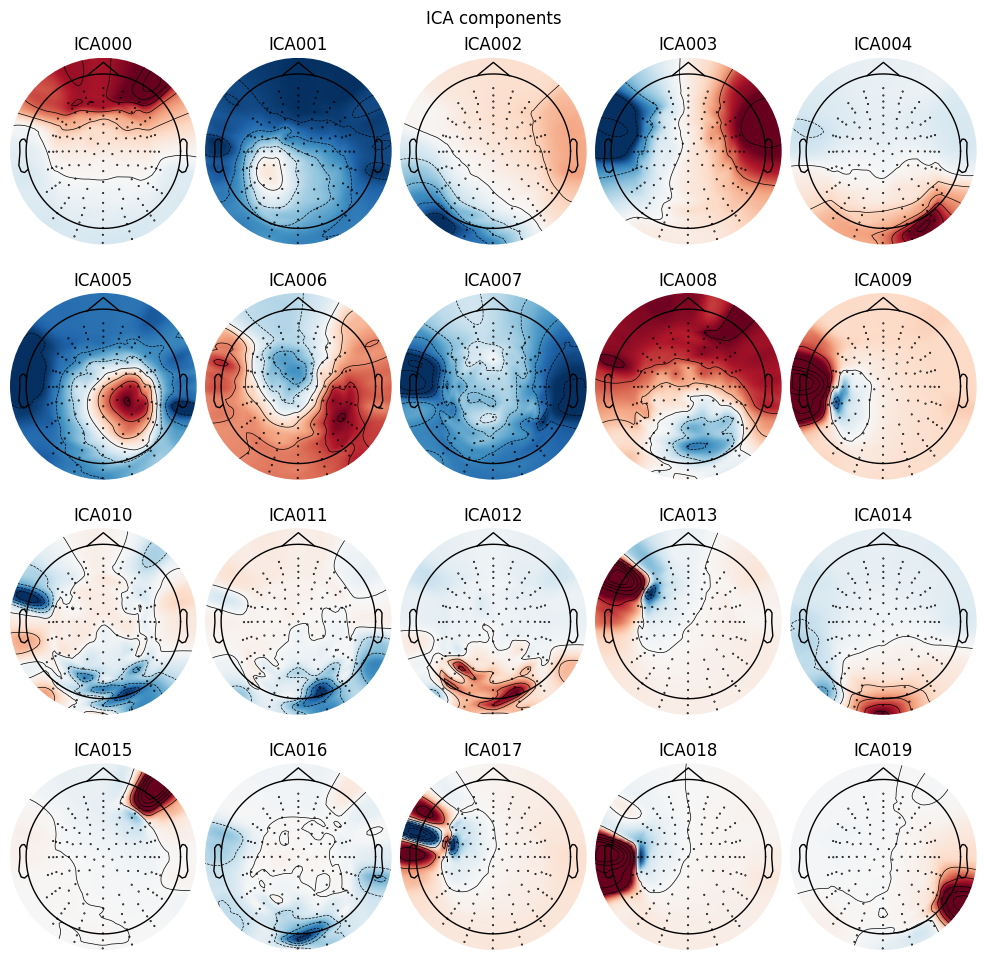

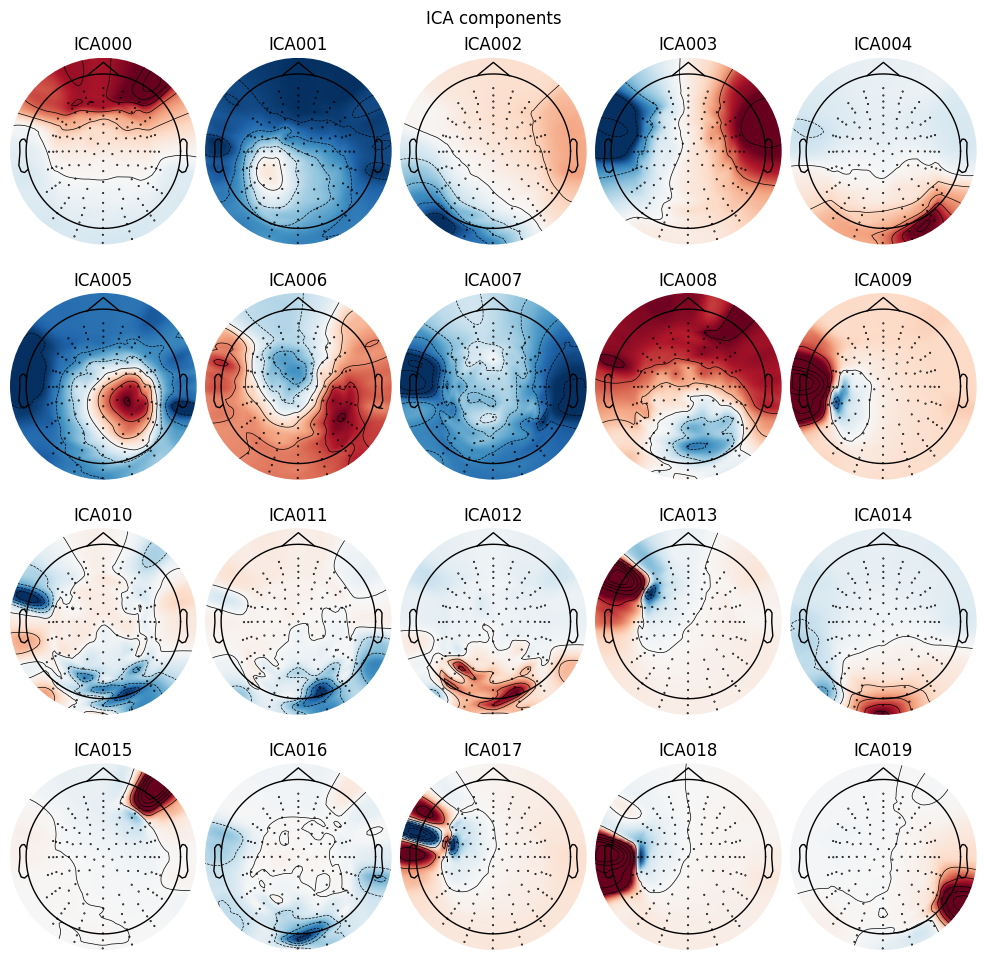

In [9]:
# plot components
ica.plot_components(picks=range(0, 20), ch_type='eeg', title='ICA components', show=True)
# automatic labeling the components


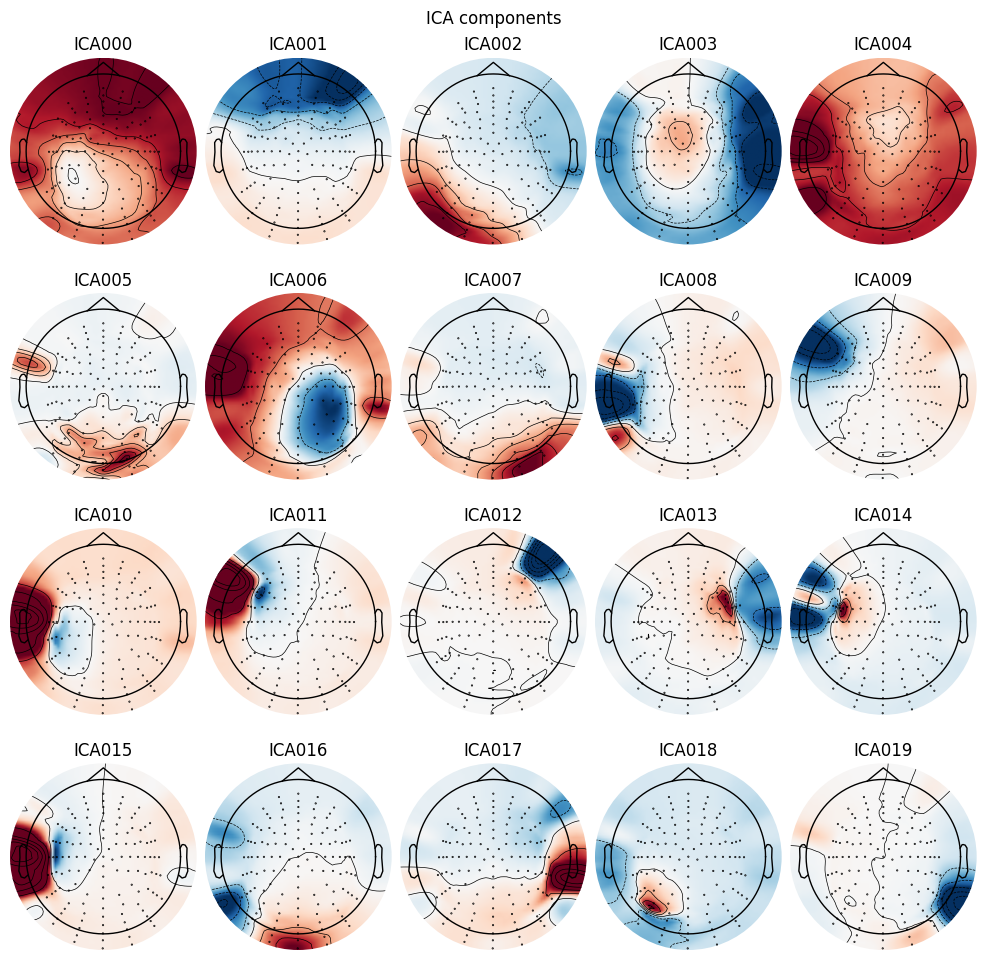

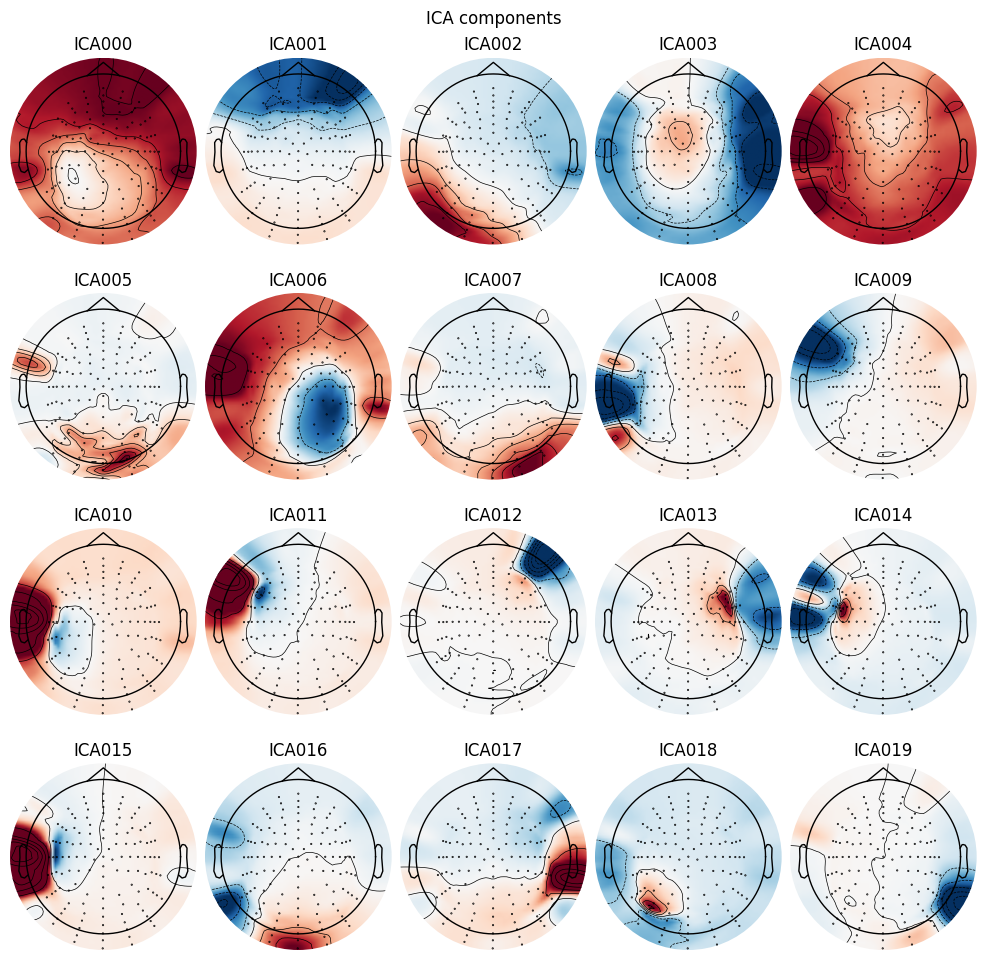

In [ ]:
# plot components
ica.plot_components(picks=range(0, 20), ch_type='eeg', title='ICA components', show=True)
# automatic labeling the components


In [12]:
from mne_icalabel import label_components

In [13]:
ic_labels = label_components(new_raw, ica, method="iclabel")

/tmp/ipykernel_6999/2114103694.py:1: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(new_raw, ica, method="iclabel")
/tmp/ipykernel_6999/2114103694.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(new_raw, ica, method="iclabel")
/tmp/ipykernel_6999/2114103694.py:1: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 

TypeError: Unable to load from type '<class 'pathlib.PosixPath'>'